In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv("extinction-threat-to-indigenous-land-species.csv")

In [3]:
def freq_mapping(column):
    frequency_order = df[f'{column}'].value_counts().sort_values(ascending=False).index
    mapping = {category: i for i, category in enumerate(frequency_order)}
    df[f'{column}']  = df[f'{column}'].map(mapping)

    len(df[f'{column}'].value_counts())


In [4]:
df['pop_trend'].value_counts()

pop_trend
STABLE +/-10%                 4690
DEC 10-30%                     361
INC >10%                       100
DEC 50-70%                      88
DEC 30-50%                      87
DEC 10-50%                      77
DEC 10-70%                      70
STABLE +/-10% or INC >=10%      55
DEC >70%                        53
DEC 30-70%                      14
Name: count, dtype: int64

In [5]:
df['population_trend'].value_counts()

population_trend
Not available           6266
Stable                  4690
Decreasing               750
Increasing               100
Stable or increasing      55
Name: count, dtype: int64

In [6]:
population_map = {'Not available': np.nan, 'Decreasing': -1, 'Stable': 0, 'Stable or increasing': 1, 'Increasing': 2}

In [7]:
df['population_trend'] = df['population_trend'].map(population_map)

df['population_trend'].value_counts()

population_trend
 0.0    4690
-1.0     750
 2.0     100
 1.0      55
Name: count, dtype: int64

In [8]:
df['population_trend'] = df['population_trend'].fillna(df['population_trend'].mean())

In [9]:
df['population_trend'].value_counts()

population_trend
-0.088472    6266
 0.000000    4690
-1.000000     750
 2.000000     100
 1.000000      55
Name: count, dtype: int64

In [10]:
# genus_map = df['genus'].value_counts(normalize=True).to_dict()

# df['genus'] = df['genus'].map(genus_map)

# len(df['genus'].unique())

In [11]:
# Removing any rows with Data Deficient

df = df[df['category'] != 'Data deficient']

# Drop Columns "SubCategory, Status_Change, SubCategory_Change" due to lack of data

df.drop(columns=['subcategory', 'status_change', 'subcategory_change'], inplace=True)

# Drop Columns that have less meaningful data

df.drop(columns=[
    'time_span_years', 'cd', 'data_poor', 'm_ori_name',
    'report_name', 'report', 'report_group_year',
    'report_group_comprehensive', 'report_id',
    'assessment_id', 'species_id', 'common_name', 'qualifiers', 'pop_trend'
], inplace=True)

# Drop Native_Resident_Living since only 1 unique value

df = df.drop(columns=['native_resident_living'])

label_columns = ['category', 'size_confidence', 'trend_confidence', 
                 'bio_status', 'conservation_dependent', 'pop_state']

label_encoder = LabelEncoder()

for col in label_columns:
    df[col] = label_encoder.fit_transform(df[col])


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8288 entries, 13 to 11860
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   species_name            8288 non-null   object 
 1   category                8288 non-null   int64  
 2   genus                   8288 non-null   object 
 3   family                  8288 non-null   object 
 4   order                   8261 non-null   object 
 5   class                   8261 non-null   object 
 6   phylum                  8261 non-null   object 
 7   kingdom                 8261 non-null   object 
 8   pop_state               8288 non-null   int64  
 9   pop_size                4981 non-null   object 
 10  size_confidence         8288 non-null   int64  
 11  trend_confidence        8288 non-null   int64  
 12  bio_status              8288 non-null   int64  
 13  conservation_dependent  8288 non-null   int64  
 14  report_group            8288 non-null   obj

In [13]:
freq_mapping('family')

In [14]:
freq_mapping('order')

In [15]:
df = df.drop(columns='species_name')

In [16]:
freq_mapping('genus')

In [17]:
freq_mapping('class')

In [18]:
df = pd.get_dummies(df, columns=['kingdom', 'domain', 'report_group'], drop_first=False)

In [19]:
df = df.drop(columns=['pop_size'])

In [20]:
freq_mapping('phylum')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8288 entries, 13 to 11860
Data columns (total 36 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   category                                  8288 non-null   int64  
 1   genus                                     8288 non-null   int64  
 2   family                                    8288 non-null   int64  
 3   order                                     8261 non-null   float64
 4   class                                     8261 non-null   float64
 5   phylum                                    8261 non-null   float64
 6   pop_state                                 8288 non-null   int64  
 7   size_confidence                           8288 non-null   int64  
 8   trend_confidence                          8288 non-null   int64  
 9   bio_status                                8288 non-null   int64  
 10  conservation_dependent                 

In [22]:
from matplotlib import rcParams

rcParams['figure.figsize'] = (15, 12) 

# sns.heatmap(df.corr(), cmap='YlGnBu', annot=True, fmt='.1f')
# plt.show()

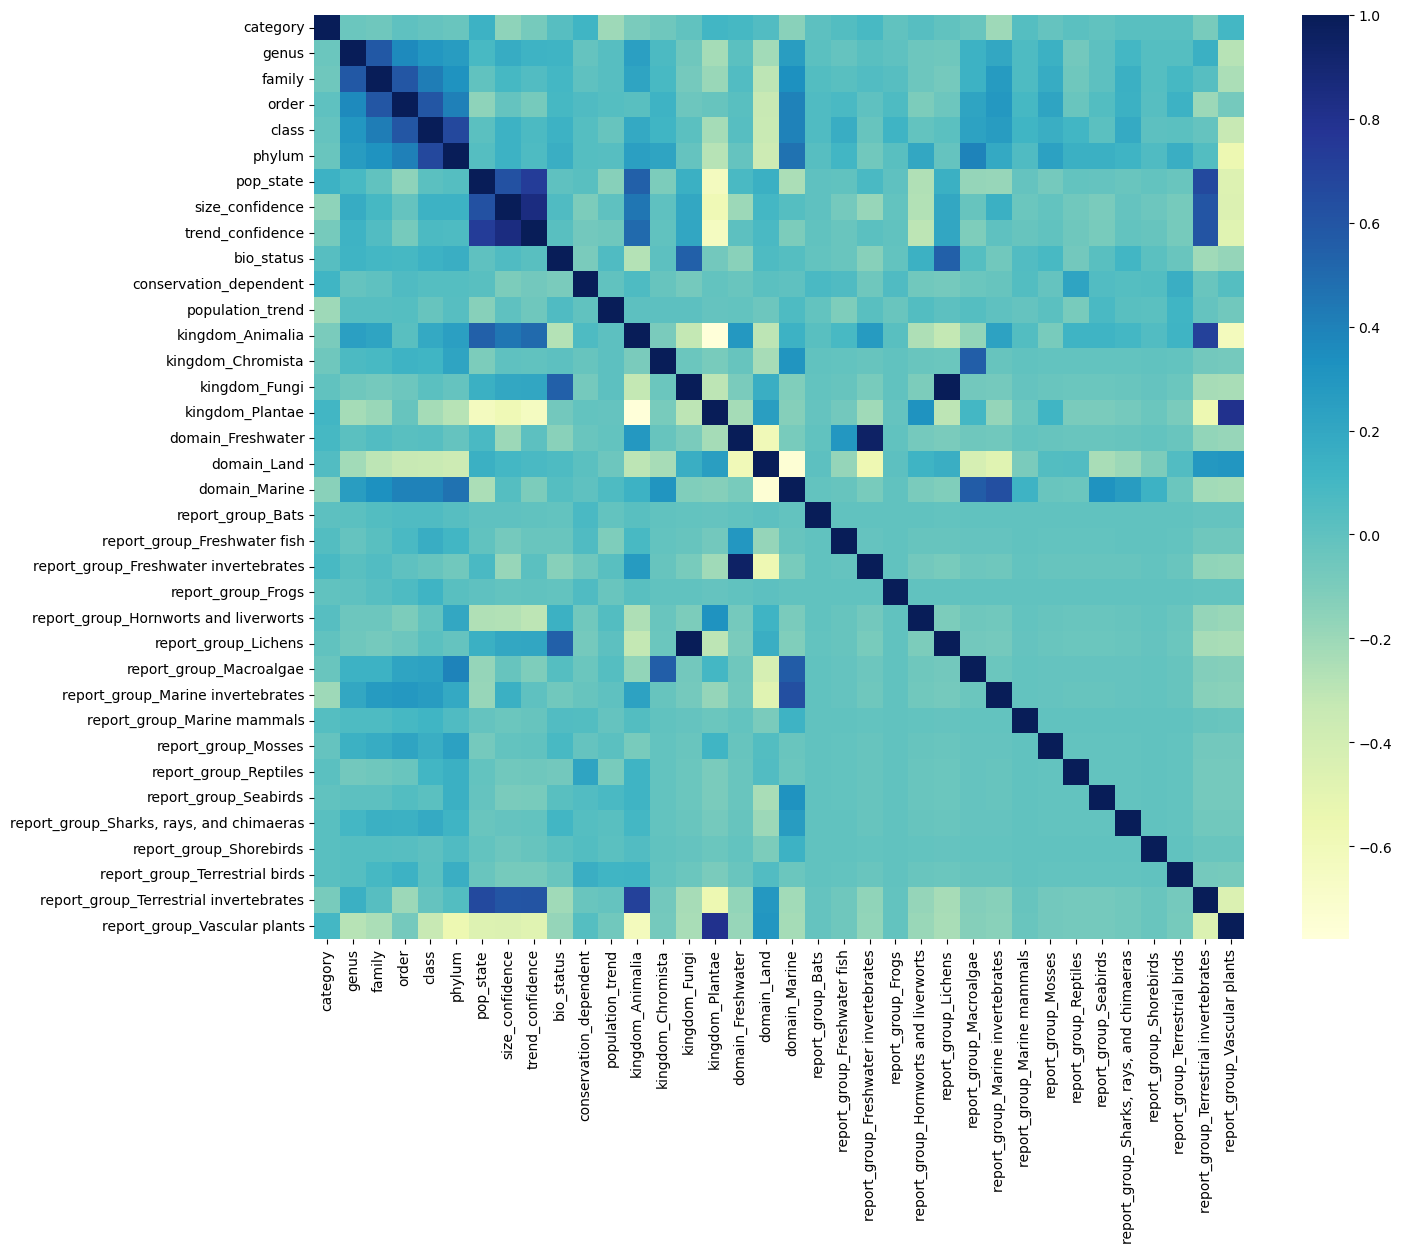

In [23]:
sns.heatmap(df.corr(), cmap='YlGnBu', fmt='.1f')
plt.show()

In [24]:
species_df = df

species_df

,category,genus,family,order,class,phylum,pop_state,size_confidence,trend_confidence,bio_status,...,report_group_Marine invertebrates,report_group_Marine mammals,report_group_Mosses,report_group_Reptiles,report_group_Seabirds,"report_group_Sharks, rays, and chimaeras",report_group_Shorebirds,report_group_Terrestrial birds,report_group_Terrestrial invertebrates,report_group_Vascular plants
13,1,120,98,42.0,10.0,7.0,0,0,0,1,...,False,False,False,False,False,False,False,False,False,False
15,1,401,98,42.0,10.0,7.0,0,0,0,1,...,False,False,False,False,False,False,False,False,False,False
16,0,1066,148,9.0,1.0,1.0,1,0,0,0,...,False,False,False,False,False,False,False,False,True,False
18,0,1465,28,9.0,1.0,1.0,1,0,0,0,...,False,False,False,False,False,False,False,False,True,False
19,0,1466,499,9.0,1.0,1.0,0,0,0,0,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11856,1,92,36,19.0,12.0,6.0,0,0,1,0,...,False,False,False,True,False,False,False,False,False,False
11857,1,92,36,19.0,12.0,6.0,0,0,2,0,...,False,False,False,True,False,False,False,False,False,False
11858,1,92,36,19.0,12.0,6.0,0,2,1,0,...,False,False,False,True,False,False,False,False,False,False
11859,2,92,36,19.0,12.0,6.0,1,2,1,0,...,False,False,False,True,False,False,False,False,False,False


In [25]:
species_df['order'] = species_df['order'].fillna(species_df['order'].mean())
species_df['class'] = species_df['class'].fillna(species_df['class'].mean())
species_df['phylum'] = species_df['phylum'].fillna(species_df['phylum'].mean())

species_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8288 entries, 13 to 11860
Data columns (total 36 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   category                                  8288 non-null   int64  
 1   genus                                     8288 non-null   int64  
 2   family                                    8288 non-null   int64  
 3   order                                     8288 non-null   float64
 4   class                                     8288 non-null   float64
 5   phylum                                    8288 non-null   float64
 6   pop_state                                 8288 non-null   int64  
 7   size_confidence                           8288 non-null   int64  
 8   trend_confidence                          8288 non-null   int64  
 9   bio_status                                8288 non-null   int64  
 10  conservation_dependent                 

In [26]:
y = species_df['category']
X = species_df.drop(columns='category')

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=84)


In [28]:
scaler = MinMaxScaler()

scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled)
X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled)

In [29]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix

neural = MLPClassifier(max_iter=500, hidden_layer_sizes=(100, 75, 80, 75, 84), activation='tanh', alpha=0.0001, learning_rate_init=0.001)

neural.fit(X_train_scaled, y_train)

pred_nn = neural.predict(X_test_scaled)

print(confusion_matrix(y_test, pred_nn))

print(classification_report(y_test, pred_nn))

[[ 393  460   72]
 [ 138 1119   27]
 [  57   55  166]]
              precision    recall  f1-score   support

           0       0.67      0.42      0.52       925
           1       0.68      0.87      0.77      1284
           2       0.63      0.60      0.61       278

    accuracy                           0.67      2487
   macro avg       0.66      0.63      0.63      2487
weighted avg       0.67      0.67      0.66      2487



In [30]:
from sklearn.model_selection import GridSearchCV

param_grid = {'hidden_layer_sizes': [(70, 35), (35, 25, 15), (40, 25), (70, 45, 35, 20, 15, 7)],
              'activation': ['relu', 'tanh'],
              'alpha': [0.001, 0.01],
              'learning_rate_init': [0.01, 0.1],
              }

In [31]:
from sklearn.metrics import root_mean_squared_error

grid_search = GridSearchCV(MLPClassifier(max_iter=500),
                           param_grid,
                           cv=5,
                           scoring='neg_root_mean_squared_error',
                           verbose=2,
                           n_jobs=-1)

In [32]:
grid_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(70, 35), learning_rate_init=0.1; total time=   0.5s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(70, 35), learning_rate_init=0.1; total time=   0.6s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(70, 35), learning_rate_init=0.1; total time=   0.7s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(70, 35), learning_rate_init=0.1; total time=   0.7s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(70, 35), learning_rate_init=0.01; total time=   1.5s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(70, 35), learning_rate_init=0.01; total time=   1.2s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(70, 35), learning_rate_init=0.01; total time=   1.4s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(70, 35), learning_rate_init=0.1; total time=   1.0s
[CV] END activation=relu, alpha=0.001, hidden_l

GridSearchCV(cv=5, estimator=MLPClassifier(max_iter=500), n_jobs=-1,
             param_grid={'activation': ['relu', 'tanh'], 'alpha': [0.001, 0.01],
                         'hidden_layer_sizes': [(70, 35), (35, 25, 15),
                                                (40, 25),
                                                (70, 45, 35, 20, 15, 7)],
                         'learning_rate_init': [0.01, 0.1]},
             scoring='neg_root_mean_squared_error', verbose=2)

In [33]:
best_grid = MLPClassifier(alpha=0.01, hidden_layer_sizes=(40, 25, 30), max_iter=500, activation='relu')

best_grid.fit(X_train_scaled, y_train)

pred_bestgrid = best_grid.predict(X_test_scaled)

print(classification_report(y_test, pred_bestgrid))

              precision    recall  f1-score   support

           0       0.71      0.68      0.70       925
           1       0.82      0.86      0.84      1284
           2       0.67      0.62      0.64       278

    accuracy                           0.77      2487
   macro avg       0.73      0.72      0.73      2487
weighted avg       0.76      0.77      0.76      2487



In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8288 entries, 13 to 11860
Data columns (total 36 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   category                                  8288 non-null   int64  
 1   genus                                     8288 non-null   int64  
 2   family                                    8288 non-null   int64  
 3   order                                     8288 non-null   float64
 4   class                                     8288 non-null   float64
 5   phylum                                    8288 non-null   float64
 6   pop_state                                 8288 non-null   int64  
 7   size_confidence                           8288 non-null   int64  
 8   trend_confidence                          8288 non-null   int64  
 9   bio_status                                8288 non-null   int64  
 10  conservation_dependent                 

In [35]:
df.to_csv('Species_data.csv', index=False)